# Lesson 1 Assignment - EnergyLoads
## Author - Aeden Jameson

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution, with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

## Load and examine the data set

In [2]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
# Cleaned up Dataset location
fileName = "EnergyEfficiencyData.csv"
energy_efficiency = pd.read_csv(fileName)

First, let's just take a look at what we have.

In [4]:
energy_efficiency.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Now lets get a feel for the size and types of data we are dealing with so we can understand what kinds of visualizations might be helpful for uncovering relationships.

In [5]:
energy_efficiency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Relative Compactness         768 non-null float64
Surface Area                 768 non-null float64
Wall Area                    768 non-null float64
Roof Area                    768 non-null float64
Overall Height               768 non-null float64
Orientation                  768 non-null int64
Glazing Area                 768 non-null float64
Glazing Area Distribution    768 non-null int64
Heating Load                 768 non-null float64
Cooling Load                 768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## Summary Statistics

Since we're dealling with only numeric data summary statistics can also help us.

In [6]:
energy_efficiency.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Scatter Plot

Since we're dealing with only numeric data. I'll start with scatter plot to get a broad overview of the the relationships in the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa38c182f60>,
      dtype=object)

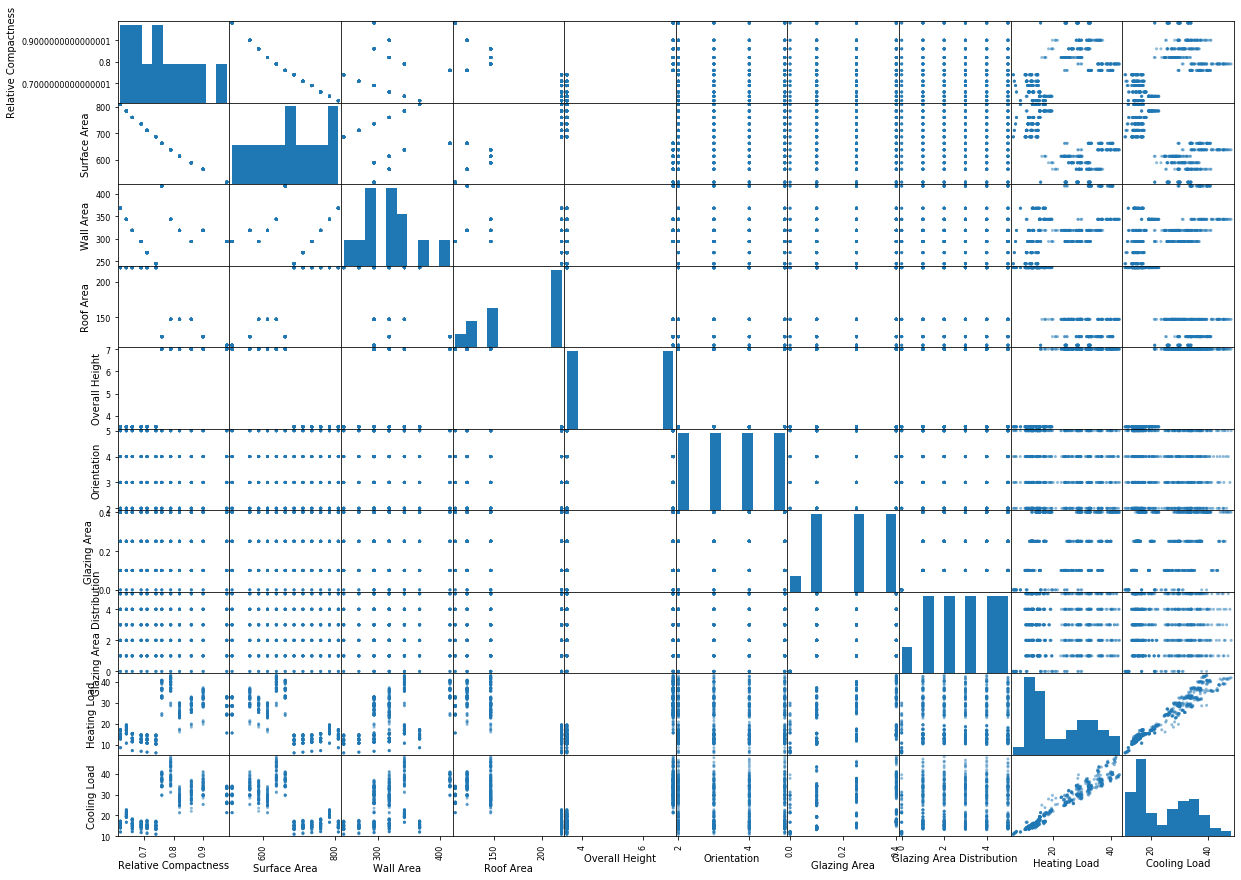

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(energy_efficiency, figsize=(20,15))

Taking a look at the last two colums and rows the relationships that standout to me immediately are overall height, relative compactness and surface area vs both heating and cooling load because the relationships look close to linear. The other relationships will take more examination.

## Pearson's Correlations

Another way to spot correlations is with Pearson's coefficient.

In [29]:
energy_efficiency.corr()["Heating Load"].sort_values(ascending=False)

Heating Load                 1.000000
Cooling Load                 0.975862
Overall Height               0.889431
Relative Compactness         0.622272
Wall Area                    0.455671
Glazing Area                 0.269841
Glazing Area Distribution    0.087368
Orientation                 -0.002587
Surface Area                -0.658120
Roof Area                   -0.861828
Name: Heating Load, dtype: float64

In [28]:
energy_efficiency.corr()["Cooling Load"].sort_values(ascending=False)

Cooling Load                 1.000000
Heating Load                 0.975862
Overall Height               0.895785
Relative Compactness         0.634339
Wall Area                    0.427117
Glazing Area                 0.207505
Glazing Area Distribution    0.050525
Orientation                  0.014290
Surface Area                -0.672999
Roof Area                   -0.862547
Name: Cooling Load, dtype: float64

In both tables overall height and relative compactness are positively correlated. And surface area and roof area are negatively correlated. 

## Closer Look at Heating vs Cooling Load

I think it's notable to observe that heating and cooling load are highly correlated. Let's quickly take a closer look at the scatter plot.

Text(0, 0.5, 'Cooling Load')

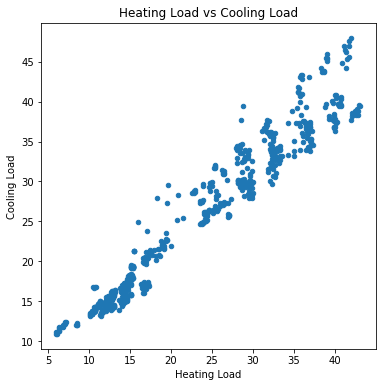

In [18]:

ax = plt.figure(figsize=(6, 6)).gca() # define axis
energy_efficiency.plot.scatter(x = 'Heating Load', y = 'Cooling Load', ax = ax)
ax.set_title('Heating Load vs Cooling Load') # Give the plot a main title
ax.set_xlabel('Heating Load')
ax.set_ylabel('Cooling Load')# Set text for y axis


This is worth noting because the same model maybe useful for predicting both heating and cooling loads.

## Looking More Closely at Relative Compactness

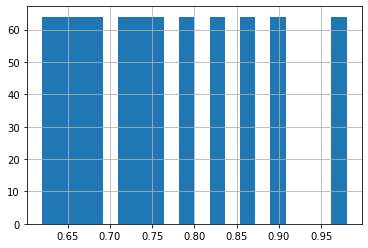

In [7]:
energy_efficiency['Relative Compactness'].hist(bins=20)

In [8]:
energy_efficiency['Relative Compactness'].unique()

array([0.98, 0.9 , 0.86, 0.82, 0.79, 0.76, 0.74, 0.71, 0.69, 0.66, 0.64,
       0.62])

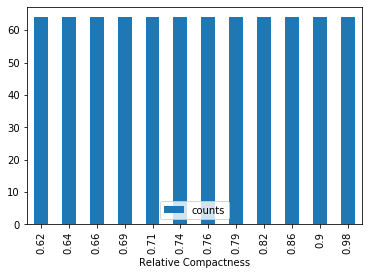

In [9]:
energy_efficiency['counts'] = 1
energy_efficiency[['Relative Compactness', 'counts']].groupby(['Relative Compactness']).agg('count').sort_values('counts').plot.bar()

Text(0, 0.5, 'Heating Load')

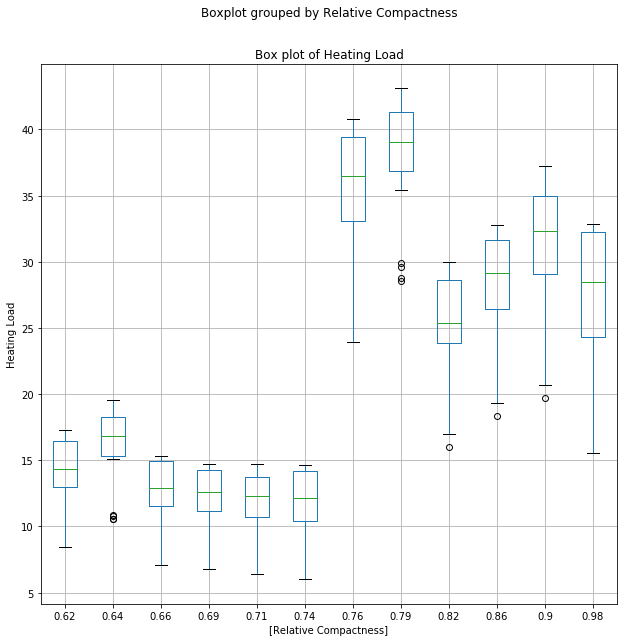

In [13]:
fig = plt.figure(figsize=(10, 10)) # Define plot area
ax = fig.gca() # Define axis 
energy_efficiency.loc[:,['Heating Load', 'Relative Compactness']].boxplot(by = 'Relative Compactness', ax = ax)
ax.set_title('Box plot of Heating Load') # Give the plot a main title
ax.set_ylabel('Heating Load')# Set text for y axis

## Looking More Closely At Roof Area

Text(0, 0.5, 'Heating Load')

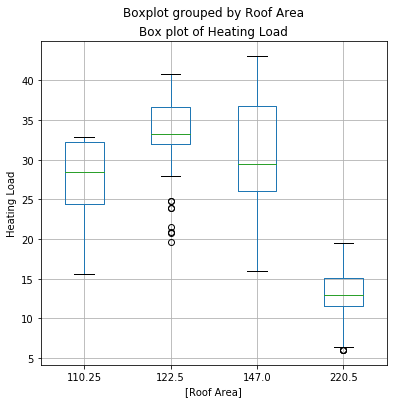

In [24]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
energy_efficiency.loc[:,['Heating Load', 'Roof Area']].boxplot(by = 'Roof Area', ax = ax)
ax.set_title('Box plot of Heating Load') # Give the plot a main title
ax.set_ylabel('Heating Load')# Set text for y axis


Text(0, 0.5, 'Cooling Load')

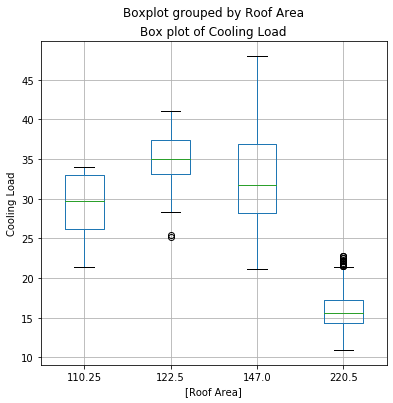

In [25]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
energy_efficiency.loc[:,['Cooling Load', 'Roof Area']].boxplot(by = 'Roof Area', ax = ax)
ax.set_title('Box plot of Cooling Load') # Give the plot a main title
ax.set_ylabel('Cooling Load')# Set text for y axis

# Key Points

1. The heating and cooling load of buildings are highly correlated. Evidence for this relationship can be seen by Pearson's coefficient and the scatter plot under the sections titled Pearson's Cofficients and Closer Look at Heating vs Cooling Load. This is significant because this may well allow us to use the same model for predicting both targets.

2. The heating and cooling load of buildings depends on overall height. Evidence for this relationship can be seen by the Pearson's coefficient under the Pearson's coefficient section above. It is however only one factor. There are two values for the height field and far great number of values for heating and cooling loads so it's unlikely that overall height alone can be a predictor.

3. The heating and cooling load of buildings depends on relative compactness. Evidence for this relationship can be seen by in the box plot under the section "Looking More Closely at Relative Compactness"

4. The heating and cooling load of buildings depends on roof area, which we see has high negative correlation. Evidence for this relationship can be seen by in the box plot under the sections "Looking More Closely at Roof Area" and "Peason's Coefficient"

Clearly we need to build more pyramids?